# Build Graphs with geometric constraints only (no ML)

**Note**: This strategy is deprecated, you almost certainly want to use `009_build_graphs_ml.ipynb` instead.

In this notebook we build graphs from the raw data.

In [41]:
from gnn_tracking.utils.plotting import EventPlotter
from gnn_tracking.graph_construction.graph_builder import GraphBuilder
from gnn_tracking.preprocessing.point_cloud_builder import PointCloudBuilder
from gnn_tracking.utils.plotting import PointCloudPlotter
from gnn_tracking.utils.versioning import assert_version_geq
from pathlib import Path

assert_version_geq("23.12.0")

In [48]:
data_path = Path.cwd().resolve().parent.parent / "test-data" / "data" / "raw"
assert data_path.is_dir(), data_path

In [49]:
# The event id that you use for these examples
evtid = 21000
# If the following statement doesn't pass, maybe you need a different
# evtid
assert (data_path / f"event{evtid:09}-cells.csv.gz").is_file()

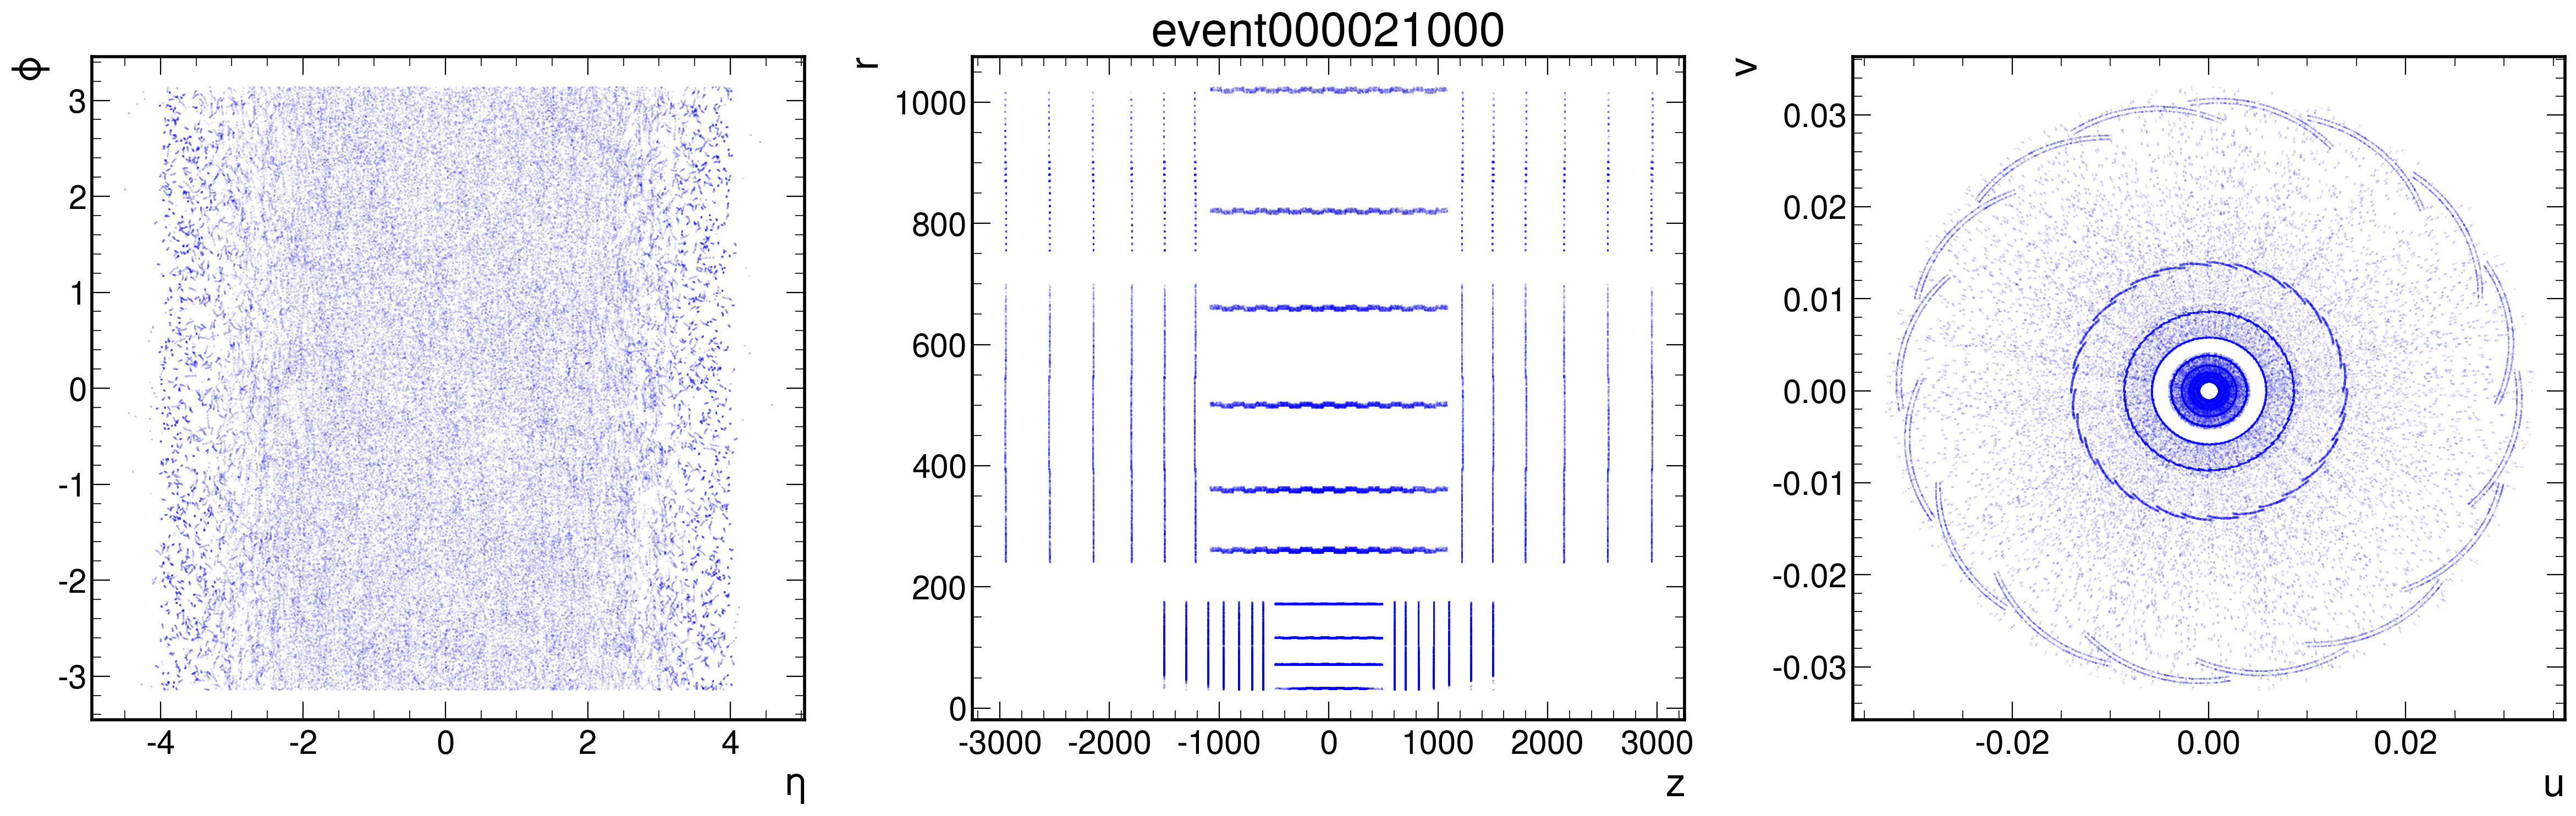

(<Figure size 4800x1600 with 3 Axes>,
 array([<Axes: xlabel='$\\eta$', ylabel='$\\phi$'>,
        <Axes: title={'center': 'event000021000'}, xlabel='$z$', ylabel='$r$'>,
        <Axes: xlabel='u', ylabel='v'>], dtype=object))

In [50]:
# The input directory should contain the trackml dataset
event_plotter = EventPlotter(indir=data_path)
event_plotter.plot_ep_rv_uv(evtid=evtid)

In [52]:
# build point clouds for each sector in the pixel layers only
pc_builder = PointCloudBuilder(
    indir=data_path,
    outdir=data_path.parent / "point_clouds" / "generated",
    n_sectors=32,
    pixel_only=True,
    redo=False,
    measurement_mode=False,
    sector_di=0,
    sector_ds=1.3,
    thld=0.9,
    log_level=0,
    detector_config=data_path / "detector_kaggle.csv",
)
pc_builder.process(stop=10)

[15:47:06 CF] INFO: Loading detector...
[15:47:06 CF] INFO: Failed to load preprocessed detector. Building...
[15:47:06 CF] DEBUG: Extracting thicknesses...
[15:47:06 CF] DEBUG: Done.
[15:47:06 CF] DEBUG: Extracting rotations...
[15:47:07 CF] DEBUG: Done.
[15:47:07 CF] DEBUG: Extracting thicknesses...
[15:47:08 CF] INFO: Detector preprocessed and saved.


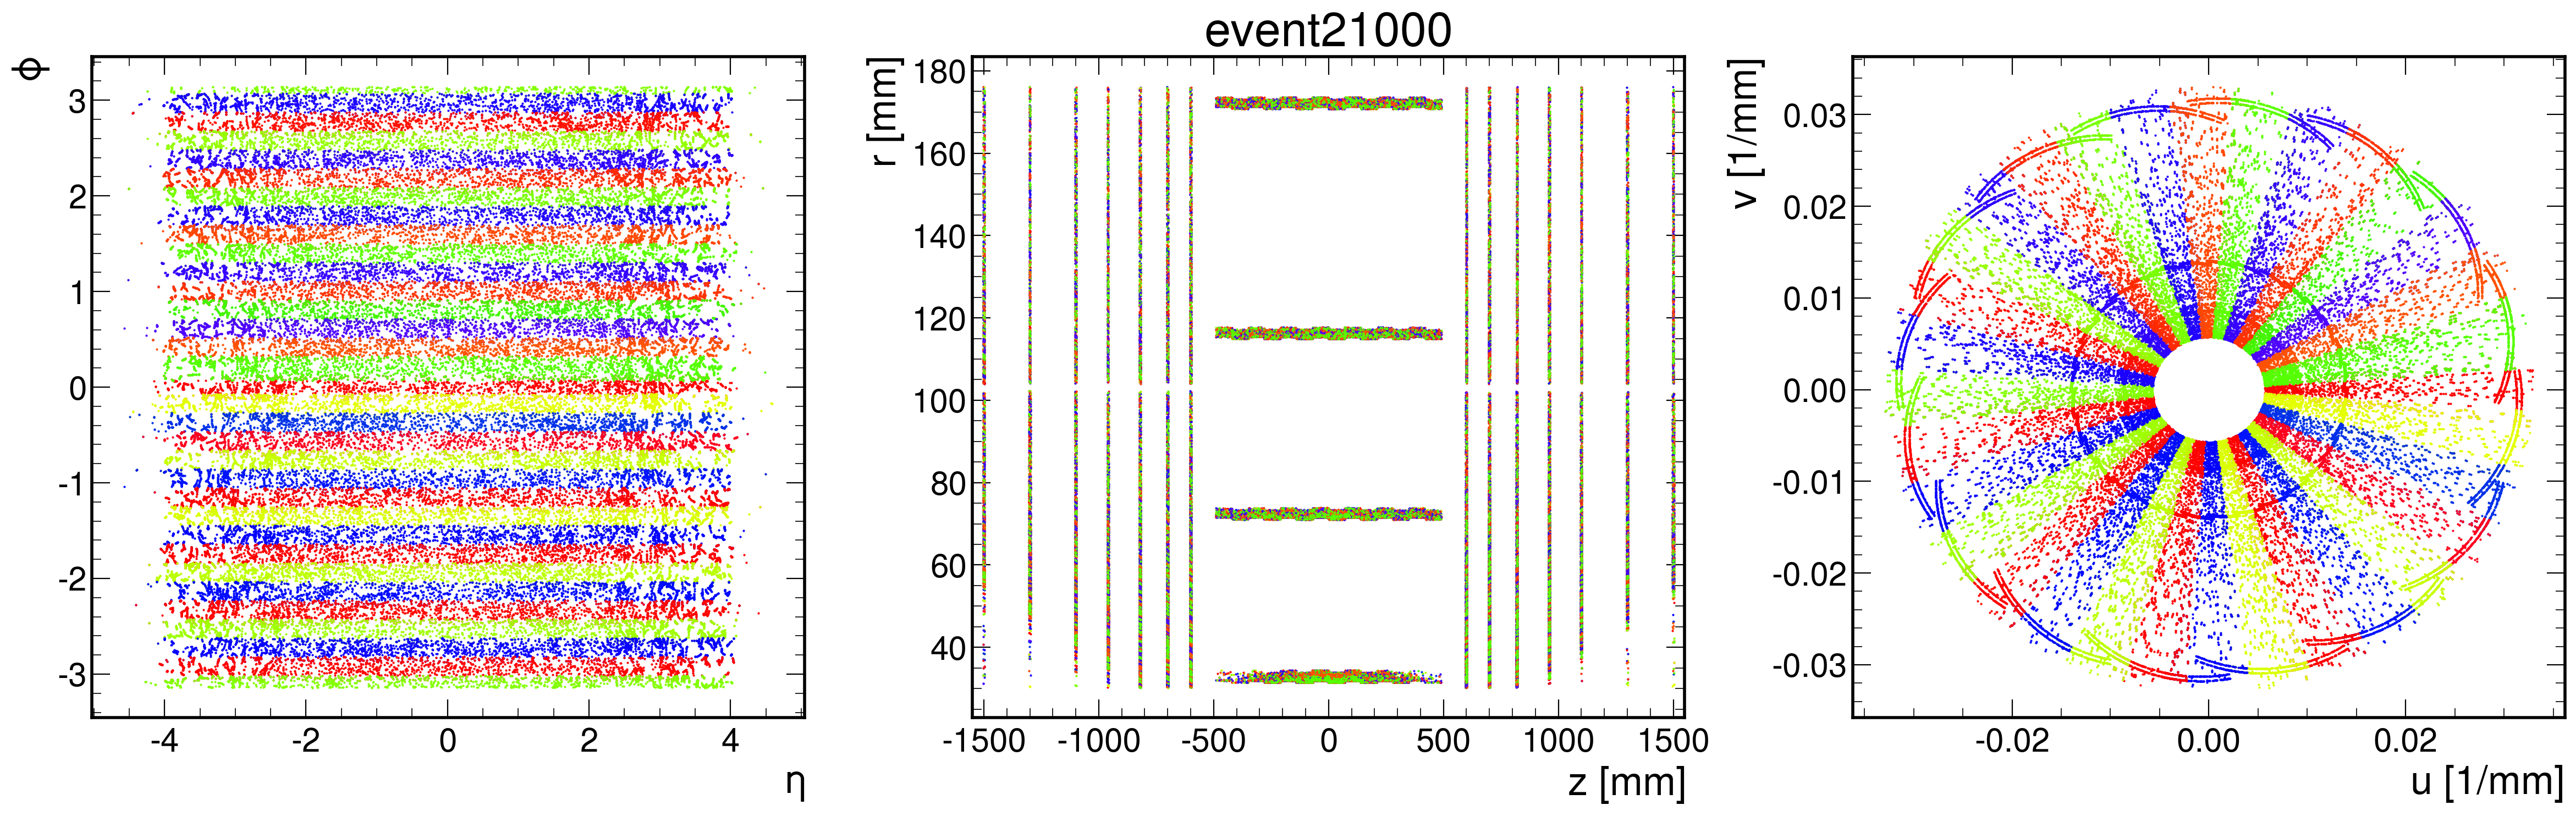

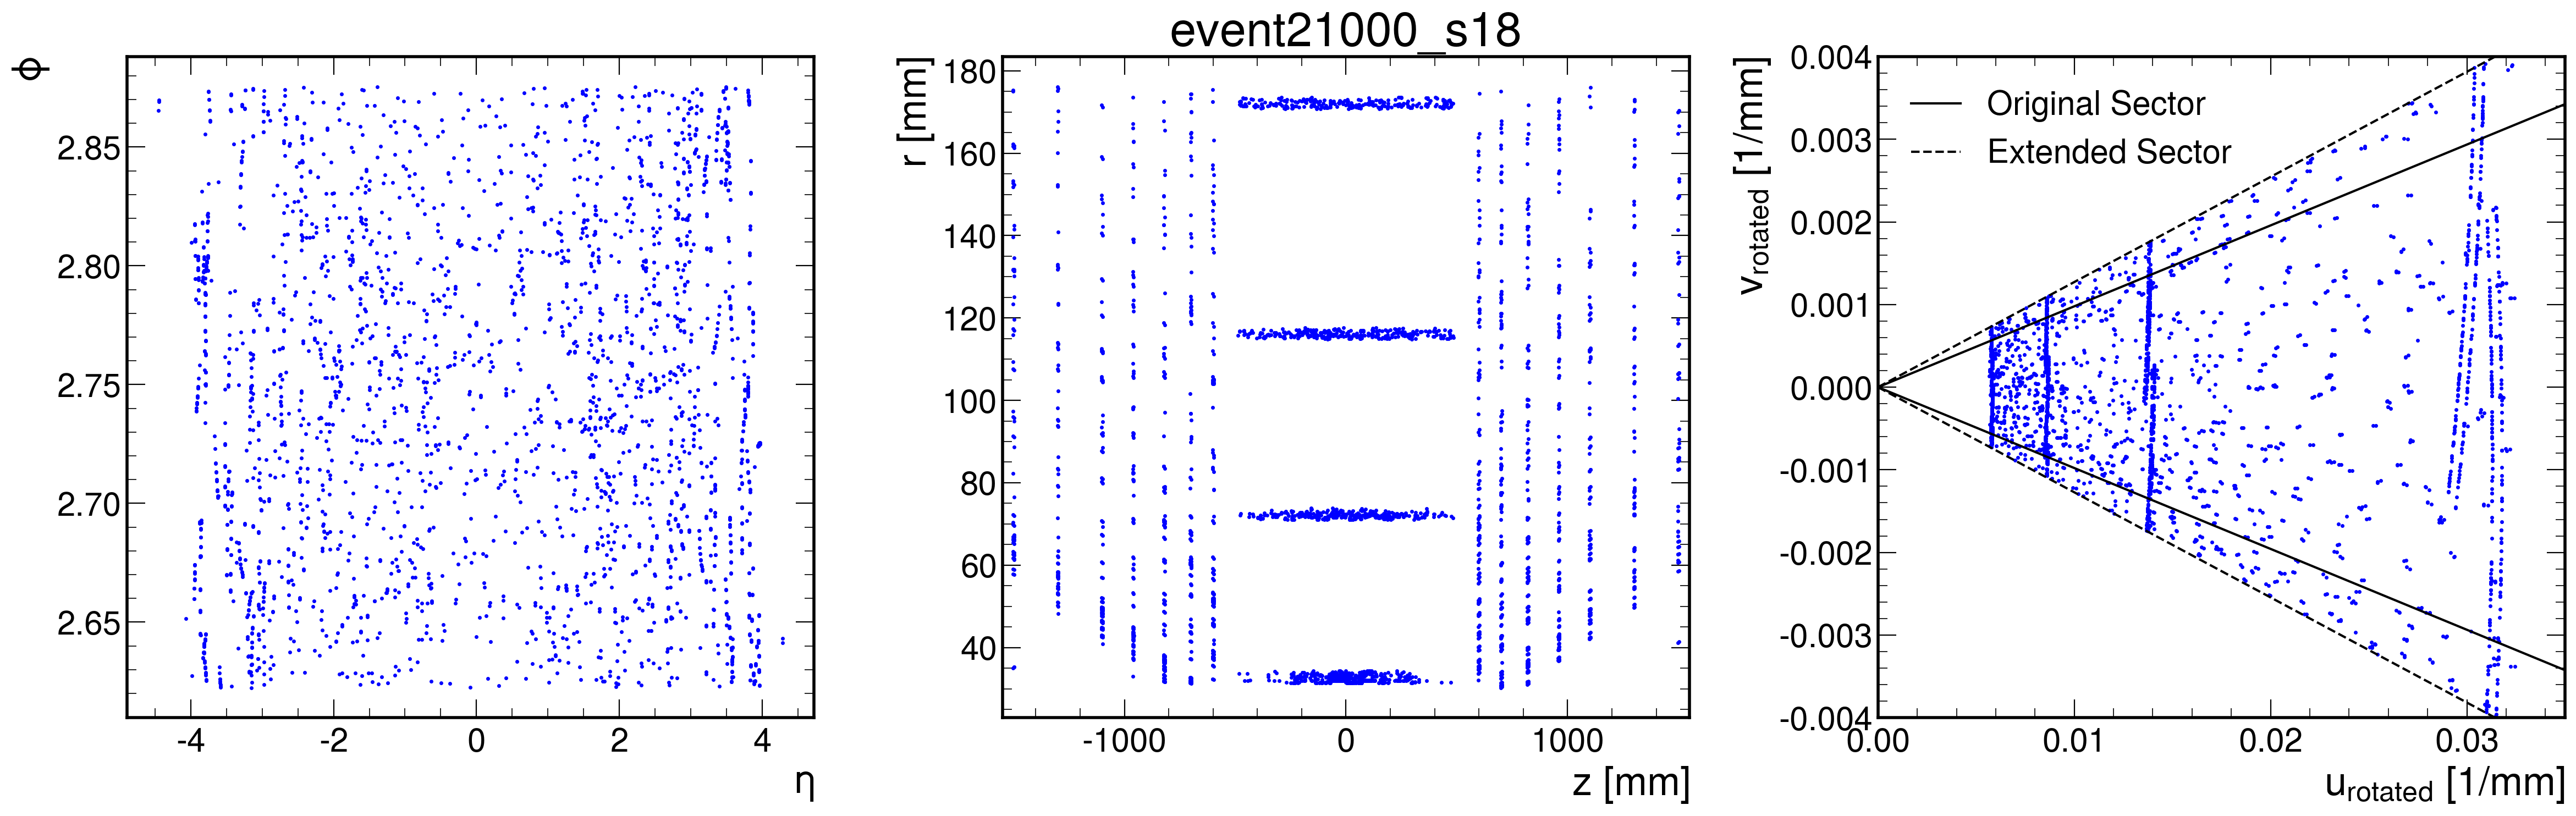

In [57]:
# visualize the sectors in each event and an overlapped ('extended') sector
pc_plotter = PointCloudPlotter(
    data_path.parent / "point_clouds" / "tutorial_generated",
    n_sectors=pc_builder.n_sectors,
)
pc_plotter.plot_ep_rv_uv_all_sectors(evtid)
pc_plotter.plot_ep_rv_uv_with_boundary(
    evtid, 18, pc_builder.sector_di, pc_builder.sector_ds
)

In [58]:
graph_builder = GraphBuilder(
    indir=data_path.parent / "point_clouds" / "tutorial_generated",
    outdir=data_path.parent / "graphs" / "tutorial_generated",
    redo=False,
    measurement_mode=False,
    phi_slope_max=0.0035,
    z0_max=200,
    dR_max=2.3,
    log_level=0,
)
graph_builder.process(start=0, stop=10)

[15:49:39 GraphBuilder] WARNING: Collecting data is deprecated. Please use graph_builder.load_data instead.
[15:49:39] INFO: Processing 10 graphs (out of 64 available).
